In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
opt_data=pd.read_csv('Ropt_Mag.csv')
opt_data[0:5]

,Name,Dist [kpc],Vopt,Ropt [kpc],Mag,x_shift,y_shift
0,ESO546-G037,53169.906083,77.808197,6.907638,-19.252202,0.015507,-11.842064
1,2MASXJ04295136-1257212,124399.144652,153.086021,9.503272,-19.912712,0.042148,-4.100701
2,ESO548-G021,29298.066174,96.739978,9.136643,-18.126029,0.190583,-3.125432
3,2MASXJ10581762+0108303,159831.075576,129.183545,5.983603,-20.413191,-0.088994,1.017964
4,2MASXJ15114298+0604059,217271.004352,229.616897,11.431974,-21.287781,0.555531,-25.473872


In [53]:
len(opt_data)

258

In [54]:
pd.DataFrame({'$R_D,avg$':np.array(bin_avg_r)/3,'$V_{opt}$':bin_avg_v})

,"$R_D,avg$",$V_{opt}$
0,3.330025,53.113435
1,2.347514,82.968529
2,3.103892,99.752933
3,3.674343,115.851980
4,3.347863,133.262611
5,3.669161,153.623423
6,4.291618,179.670326
7,5.109350,240.853690


### Homogeneise errors

In [55]:
for i in range(len(opt_data)):
    
    rcurve=pd.read_csv(opt_data['Name'][i]+'_rc_shifted.prof')
    
    rc_r= np.abs(pd.to_numeric(rcurve['R_fol [kpc]'][1:]).to_numpy())
    ropt=opt_data['Ropt [kpc]'][i]
    rc_r=rc_r/ropt
    
    rc_v=np.abs(pd.to_numeric(rcurve['V_fol'][1:]).to_numpy())
    vopt=opt_data['Vopt'][i]
    rc_v=rc_v/vopt
    
    rc_dv=pd.to_numeric(rcurve['V_e'][1:]).to_numpy()
    rc_dv=rc_dv/vopt
    
    less=rc_dv<0.02*rc_v
    rc_dv[less]=0.02*rc_v[less]
    
    df=pd.DataFrame({'r':rc_r,'v':rc_v,'err':rc_dv})
    df.to_csv(opt_data['Name'][i]+'_rc_3.csv',mode='w', header=True)    

### Construct bins of (almost) equal width

Text(0, 0.5, 'Number of galaxies')

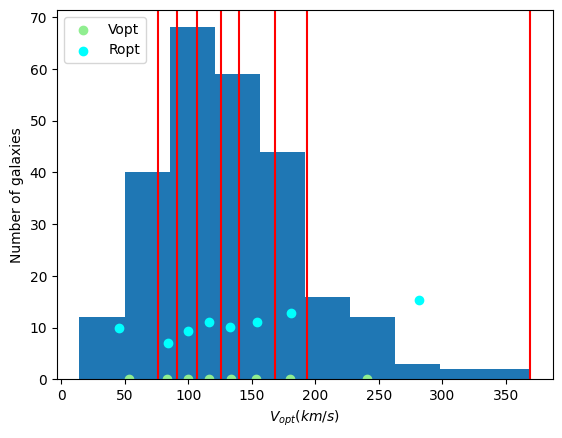

In [56]:
plt.hist(opt_data['Vopt'],bins=10)

for i in lower:
    plt.axvline(i,color='red')
    
for i in range(len(lower)):
    if i==0:
        plt.scatter(bin_avg_v[i],0,color='lightgreen',label='Vopt')
        plt.scatter(0.5*(np.array(upper)+np.array(lower))[i],bin_avg_r[i],color='cyan',label='Ropt')
    else:
        plt.scatter(bin_avg_v[i],0,color='lightgreen')
        plt.scatter(0.5*(np.array(upper)+np.array(lower))[i],bin_avg_r[i],color='cyan')
plt.legend()
plt.xlabel('$V_{opt}(km/s)$')
plt.ylabel('Number of galaxies')

In [57]:
bins = []
num_bins = 8
data_points_per_bin = len(opt_data) // num_bins
bins = [opt_data['Name'][_ * data_points_per_bin: (_+1)*data_points_per_bin] for _ in range(num_bins)]

print(len(opt_data))
bb=np.array([len(i) for i in bins])
print(np.sum(bb))

258
256


In [58]:
bins[-1]

224                    UGC12494
225                    UGC12521
226                    UGC12543
227                    UGC12562
228                    UGC12564
229                    UGC12571
230                    UGC12583
231                    UGC12667
232                    UGC12678
233                    UGC12701
234                    UGC12746
235                    UGC12816
236    WISEAJ003715.84-563658.2
237    WISEAJ004024.58-561650.0
238    WISEAJ010951.36-461413.7
239    WISEAJ043012.94-610941.5
240    WISEAJ070853.46+484953.4
241    WISEAJ111003.04+214103.0
242    WISEAJ111020.28+211924.2
243    WISEAJ132958.87+110353.1
244    WISEAJ151005.44+054657.6
245    WISEAJ151038.75+054027.6
246    WISEAJ151348.75+070916.2
247    WISEAJ152538.91+084211.1
248    WISEAJ163623.19+662433.8
249    WISEAJ201142.85-570328.7
250    WISEAJ205108.38-530238.7
251    WISEAJ223541.89+013933.5
252    WISEAJ232508.27+151758.3
253    WISEAJ234132.26+090432.1
254    WISEAJ234313.85+083455.7
255    W

In [59]:
bins[-1]=pd.concat([bins[-1], pd.Series([opt_data['Name'][256], opt_data['Name'][257]],index=[256,257])])
bins[-1]

224                    UGC12494
225                    UGC12521
226                    UGC12543
227                    UGC12562
228                    UGC12564
229                    UGC12571
230                    UGC12583
231                    UGC12667
232                    UGC12678
233                    UGC12701
234                    UGC12746
235                    UGC12816
236    WISEAJ003715.84-563658.2
237    WISEAJ004024.58-561650.0
238    WISEAJ010951.36-461413.7
239    WISEAJ043012.94-610941.5
240    WISEAJ070853.46+484953.4
241    WISEAJ111003.04+214103.0
242    WISEAJ111020.28+211924.2
243    WISEAJ132958.87+110353.1
244    WISEAJ151005.44+054657.6
245    WISEAJ151038.75+054027.6
246    WISEAJ151348.75+070916.2
247    WISEAJ152538.91+084211.1
248    WISEAJ163623.19+662433.8
249    WISEAJ201142.85-570328.7
250    WISEAJ205108.38-530238.7
251    WISEAJ223541.89+013933.5
252    WISEAJ232508.27+151758.3
253    WISEAJ234132.26+090432.1
254    WISEAJ234313.85+083455.7
255    W

### Vopt Bins

In [60]:
vopt=pd.to_numeric(opt_data['Vopt']).to_numpy()
ropt=pd.to_numeric(opt_data['Ropt [kpc]']).to_numpy()
mag=pd.to_numeric(opt_data['Mag']).to_numpy()

files=[opt_data['Name'][i]+'_rc_3.csv' for i in range(len(opt_data))]
log_vopt=np.log10(vopt)

print(log_vopt.min(),log_vopt.max())
print(np.sum([len(i) for i in bins]))

1.1510714919973843 2.567461161123193
258


In [61]:
data=[[] for i in range(8)]

df2=pd.DataFrame({'Name':opt_data['Name'],'vopt':opt_data['Vopt'], 'ropt':opt_data['Ropt [kpc]']})
df2=df2.sort_values(by=['vopt'])
data[0]=df2[0:32]
data[1]=df2[32:64]
data[2]=df2[64:96]
data[3]=df2[96:128]
data[4]=df2[128:160]
data[5]=df2[160:192]
data[6]=df2[192:224]
data[7]=df2[224:]


for i in range(8):
    selected_data = [item for item in data[i]['Name']]
    dfs = [pd.read_csv(f'{name}_rc_3.csv') for name in selected_data]
    concatenated_df = pd.concat(dfs, axis=0)
    concatenated_df.to_csv(f'log_vopt_binned_{i}_newest.csv', header=True, mode='w')

In [62]:
data2=[[] for i in range(8)]

for i in range(8):
    selected_data = [item for item in data[i]['Name']]
    dfs = [pd.read_csv(f'{name}_rc_2.csv') for name in selected_data]
    concatenated_df = pd.concat(dfs, axis=0)
    concatenated_df.to_csv(f'log_vopt_binned_{i}_newest_filtered.csv', header=True, mode='w')

In [63]:
lower=[]
upper=[]

for i in range(8):
    upper.append(data[i]['vopt'].min())
    lower.append(data[i]['vopt'].max())
    print(data[i]['vopt'].min(),data[i]['vopt'].max())

14.16026862026862 75.75603101283859
76.23892214131884 91.35756281480651
92.7913607980966 106.50360827410432
106.5670124522981 125.49035925496432
125.57806026609369 139.92877144307616
140.2088888382753 167.9568980670359
168.23162643299915 193.11114932005125
193.5558969944813 369.36961022388766


In [64]:
bin_avg_v=[]
bin_avg_r=[]

for i in range(8):
    bin_avg_v.append(np.mean(data[i]['vopt']))
    bin_avg_r.append(np.mean(data[i]['ropt']))
    
print(bin_avg_v)
print(bin_avg_r)

[53.11343513770514, 82.9685285473563, 99.75293258602721, 115.85198036304831, 133.26261104702695, 153.62342263846637, 179.67032624341968, 240.85368998050632]
[9.990073658142588, 7.042543294166109, 9.311675980435453, 11.02302822693041, 10.043588250265872, 11.007484410893198, 12.87485458483248, 15.328049129568335]


In [65]:
np.round(bin_avg_r,2)

array([ 9.99,  7.04,  9.31, 11.02, 10.04, 11.01, 12.87, 15.33])

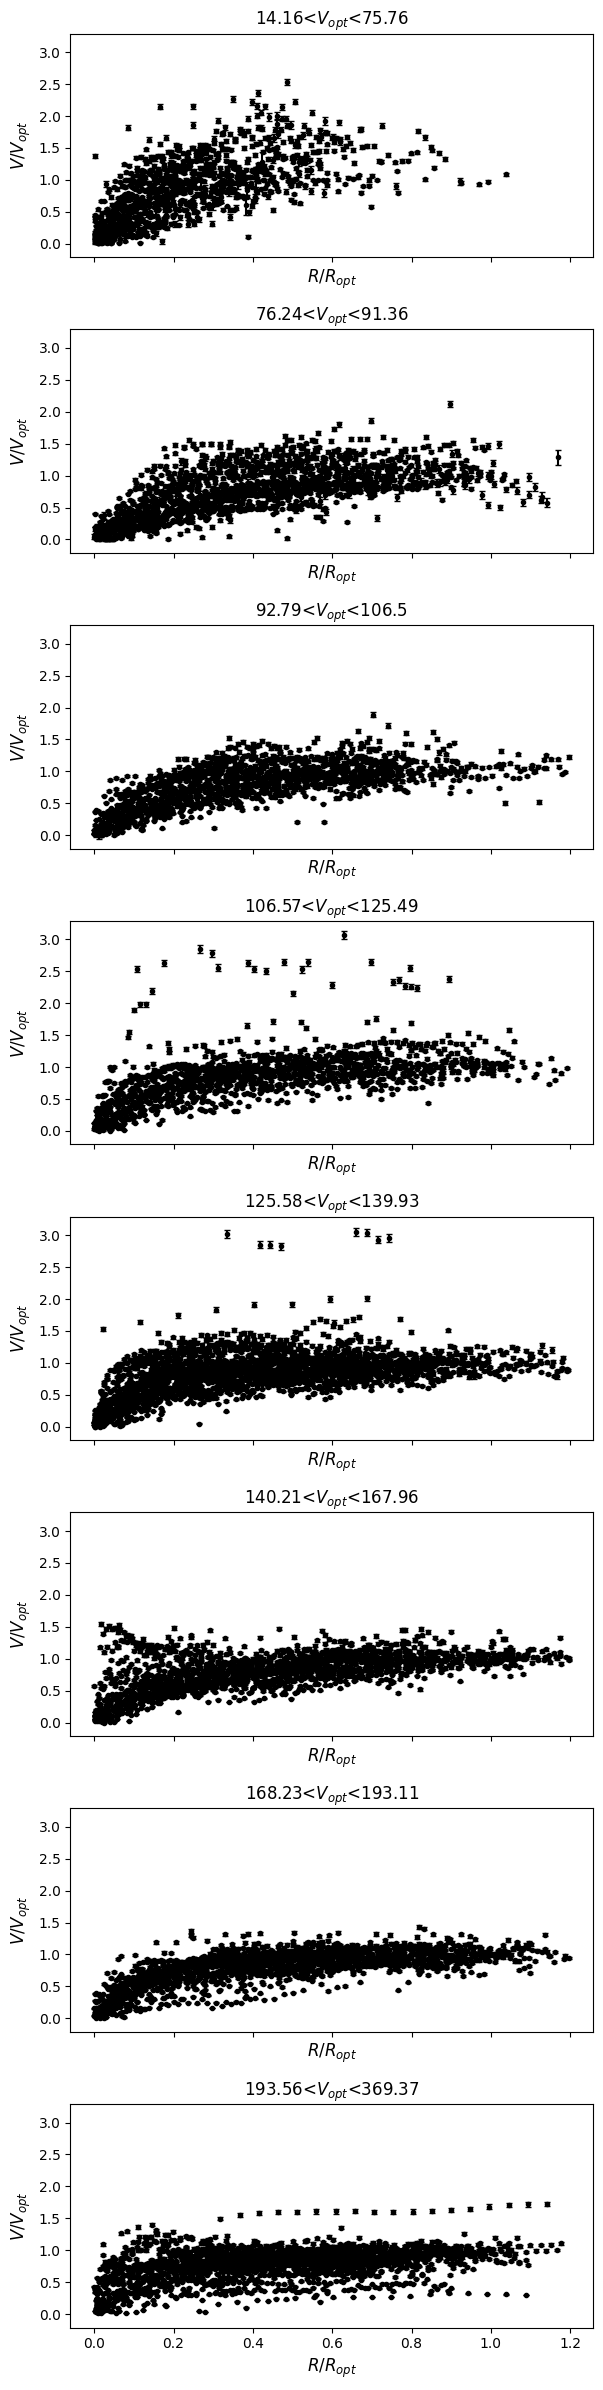

In [66]:
fig,ax=plt.subplots(8,figsize=(6,24),sharex=True,sharey=True)
for i in range(8):
    df=pd.read_csv('log_vopt_binned_{}_newest_filtered.csv'.format(i))
    
    rc_r= pd.to_numeric(df['r']).to_numpy()
    less=rc_r<1.2
    rc_r=rc_r[less]
    
    rc_v= pd.to_numeric(df['v']).to_numpy()
    rc_v=rc_v[less]
    
    rc_err= pd.to_numeric(df['err']).to_numpy()
    rc_err=rc_err[less]
       
    ax[i].errorbar(rc_r,rc_v,np.abs(rc_err),fmt='.',color='black',capsize=2)
    ax[i].set_xlabel('$R/R_{opt}$',fontsize='large')
    ax[i].set_ylabel('$V/V_{opt}$',fontsize='large')
    ax[i].set_title('{}'.format(np.round(upper[i],2))+'<$V_{opt}$<'+'{}'.format(np.round(lower[i],2)),fontsize='large')

plt.tight_layout()
plt.show()

### Radial Bins

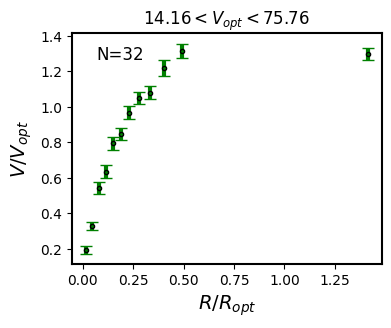

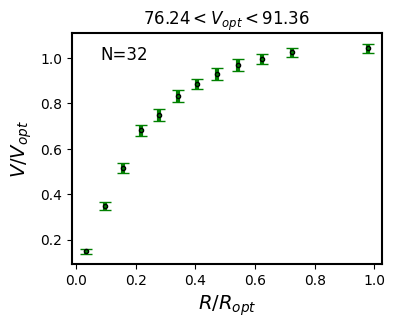

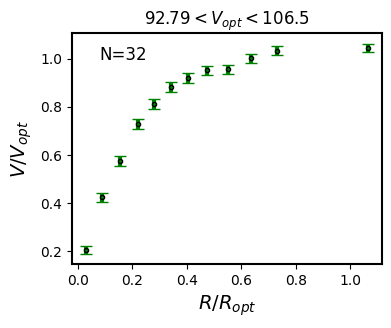

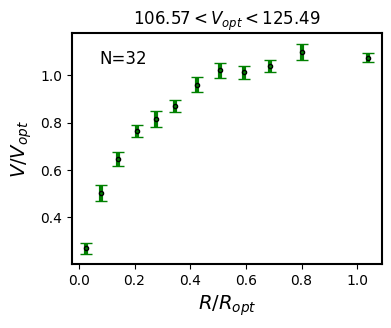

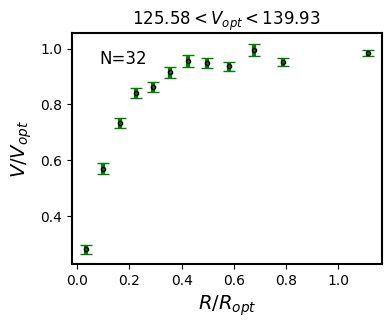

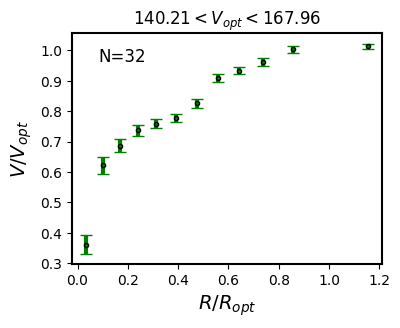

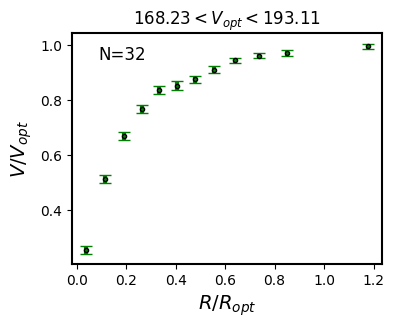

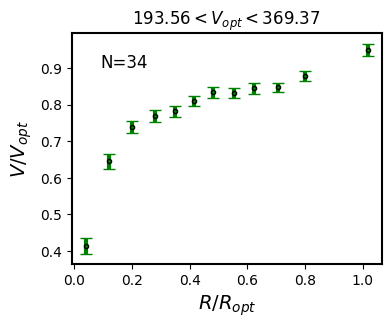

In [67]:
for i in range(8):
    
    df=pd.read_csv('log_vopt_binned_{}_newest_filtered.csv'.format(i))
    
    #Extract all data
    rc_r= pd.to_numeric(df['r']).to_numpy()
    rc_v= pd.to_numeric(df['v']).to_numpy()
    rc_err= pd.to_numeric(df['err']).to_numpy()
       

    #Create bins containing equal data points and assign values
    qs=pd.qcut(rc_r,q=12)
    qs2=qs.unique()
    df2 = pd.DataFrame({'r': rc_r, 'v':rc_v, 'dv': rc_err, 'Quantile': qs})
    binned=[df2[df2['Quantile']==q] for q in qs2]
    
    xplot=[]
    yplot=[]
    dyplot=[]
    
    for binn in binned:
               
        
        x= pd.to_numeric(binn['r']).to_numpy()
        y= pd.to_numeric(binn['v']).to_numpy()
        dy= pd.to_numeric(binn['dv']).to_numpy()
        
        
        xval=0.5*(min(x)+max(x))
        yval=np.average(y)
        dyval=np.sqrt((np.sum((y-yval)**2))/(len(x)-1)/(len(x)))
        
        xplot.append(xval)
        yplot.append(yval)
        dyplot.append(dyval)

    dffin=pd.DataFrame({'r':xplot,'v':yplot,'err':dyplot})
    dffin.to_csv('{mini}<$V_opt$<{maxi}_newest_filtered.csv'.format(mini=np.round(upper[i],2),maxi=np.round(lower[i],2)),mode='w', header=True)
    
    fig,ax=plt.subplots(figsize=(4,3))
    plt.errorbar(xplot,yplot,dyplot,fmt='.',elinewidth=3,markerfacecolor='green', markeredgecolor='black', ecolor='green',color='black',capsize=4,label='Binned RCs')
    #plt.ylim(0,2)
    plt.title('{}'.format(np.round(upper[i],2))+'$<V_{opt}<$'+'{}'.format(np.round(lower[i],2)))
    
    if i!=7:
        plt.text(x=min(xplot)+0.05,y=max(yplot)-0.05,s='N={}'.format(bb[i]),fontsize=12)
        
    else:
        plt.text(x=min(xplot)+0.05,y=max(yplot)-0.05,s='N=34',fontsize=12)
        
    plt.xlabel('$R/R_{opt}$',fontsize=14,fontweight='bold')
    plt.ylabel('$V/V_{opt}$',fontsize=14,fontweight='bold')
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    #plt.legend(frameon=False)
    plt.show()

In [68]:
upper

[14.16026862026862,
 76.23892214131884,
 92.7913607980966,
 106.5670124522981,
 125.57806026609369,
 140.2088888382753,
 168.23162643299915,
 193.5558969944813]

In [69]:
lower

[75.75603101283859,
 91.35756281480651,
 106.50360827410432,
 125.49035925496432,
 139.92877144307616,
 167.9568980670359,
 193.11114932005125,
 369.36961022388766]

Text(0, 0.5, '$R_D (kpc)$')

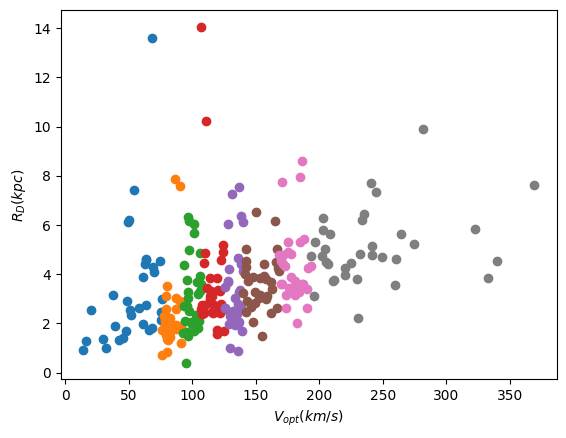

In [42]:
for i in range(8):
    plt.scatter(data[i]['vopt'],data[i]['ropt']/3)
plt.xlabel('$V_{opt} (km/s)$')
plt.ylabel('$R_D (kpc)$')

In [24]:
opt_data.sort_values(by='Ropt [kpc]')

,Name,Dist [kpc],Vopt,Ropt [kpc],Mag,x_shift,y_shift
153,NGC5949,5543.764182,94.854407,1.214577,-16.847727,0.002985,-6.338592
34,IC3298,16500.000000,76.238922,2.199931,-16.485303,-0.015870,0.978659
95,NGC1258,16061.870666,79.660166,2.546987,-17.855387,-0.034263,2.001230
144,NGC4808,10963.575563,135.587058,2.691091,-18.544577,-0.017069,5.839014
20,IC0796,16500.000000,14.160269,2.765099,-18.213766,0.008680,-0.381781
...,...,...,...,...,...,...,...
103,NGC1365,29782.264549,186.529803,25.764225,-22.888084,0.035747,5.691175
129,NGC3646,63754.436200,281.309685,29.698163,-22.962705,0.192842,-14.180335
17,ESO147-G005,138045.125608,110.326427,30.720145,-22.544829,-0.035014,0.072014
242,WISEAJ111020.28+211924.2,124986.734845,67.911904,40.770212,-18.427232,0.020327,-2.454559


(array([ 7., 24., 46., 45., 39., 30., 29., 10., 13.,  0.,  9.,  2.,  0.,
         1.,  1.,  0.,  0.,  0.,  0.,  2.]),
 array([ 0.40485916,  1.08770417,  1.77054917,  2.45339418,  3.13623918,
         3.81908419,  4.50192919,  5.1847742 ,  5.8676192 ,  6.55046421,
         7.23330921,  7.91615422,  8.59899923,  9.28184423,  9.96468924,
        10.64753424, 11.33037925, 12.01322425, 12.69606926, 13.37891426,
        14.06175927]),
 <BarContainer object of 20 artists>)

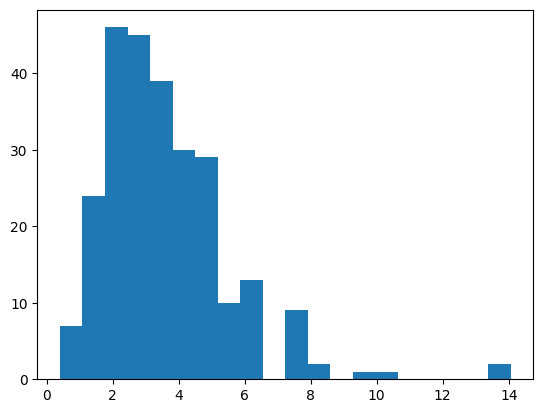

In [26]:
plt.hist(opt_data['Ropt [kpc]']/3,bins=20)

75.75603101283859
91.35756281480651
106.50360827410432
125.49035925496432
139.92877144307616
167.9568980670359
193.11114932005125
369.36961022388766


Text(0, 0.5, '$R_D(kpc)$')

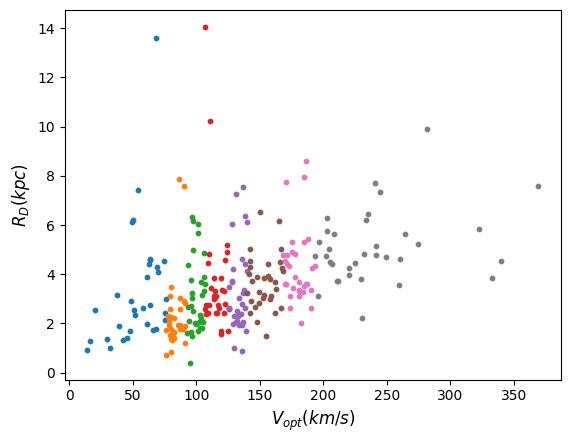

In [44]:
for i in range(8):
    plt.scatter(data[i]['vopt'],data[i]['ropt']/3,s=10)
    print(max(data[i]['vopt']))
plt.xlabel('$V_{opt}(km/s)$',fontsize='large')
plt.ylabel('$R_D(kpc)$',fontsize='large')

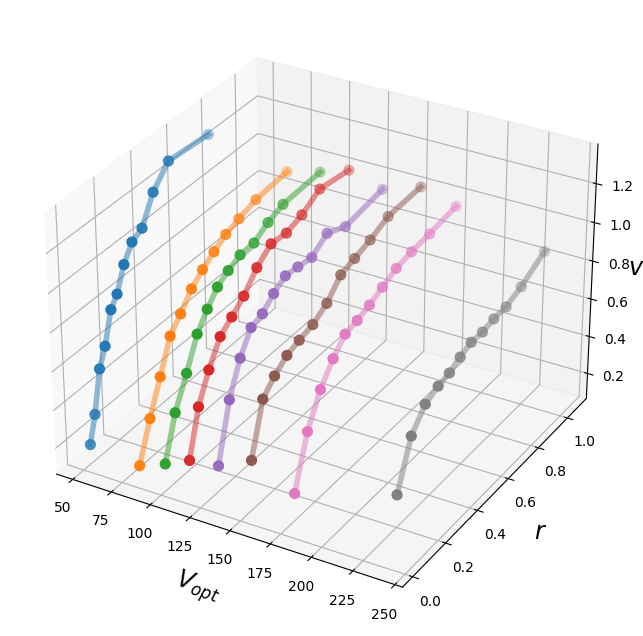

In [38]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i in range(8):
    data2=pd.read_csv('{mini}<$V_opt$<{maxi}_newest_filtered.csv'.format(mini=np.round(upper[i],2),
                                                                         maxi=np.round(lower[i],2)))
    data2=data2.sort_values(by=['r'])
    ax.plot3D((bin_avg_v[i])*np.ones(len(data2)), data2['r'], data2['v'],linewidth=4,alpha=0.5)
    ax.scatter((bin_avg_v[i]) * np.ones(len(data2)), data2['r'], data2['v'], s=50)
    
ax.set_xlabel(r'$V_{opt}$',fontsize='xx-large',fontweight='bold')
ax.set_ylabel(r'$r$',fontsize='xx-large',fontweight='bold')
ax.set_zlabel(r'$v$',fontsize='xx-large',fontweight='bold')
ax.zaxis.labelpad = -1.5
ax.yaxis.labelpad = 7
ax.xaxis.labelpad = 9

In [42]:
bin_avg_r

[9.990073658142588,
 7.042543294166109,
 9.311675980435453,
 11.02302822693041,
 10.043588250265872,
 11.007484410893198,
 12.87485458483248,
 15.328049129568335]